In [1]:
import viz
import util
#import mp_process

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# Final Project Large Scale Data Methods
### Jesus Ramirez and Aleister Montfort
#### December 2018

#### Goal


This project aimed to make use of the tools we learned in class; specifically, we used python parallel methods to retrieve and analyze data.
The project created an initial pipeline to analyze news related to violence in Mexico for the most important urban conglomerates in the country, making use of natural language process methods

**Data**

We retrieved the data from https://newsapi.org/. As you can see in the code, we created requests using the API from newsapi.org using words we believe are related to violence and crime. To scope the geographic dimension of the searches, we combined keywords of crimes and usual words used in the news that report crimes, jointly with the name of the cities.
We then gathered all the data from these searches using a beautiful soup object, and classified the news into relevant or not relevant, according to its content. In specific, we stemmed the letters of the news and compared them to stemmed letters of the relevant searches. If the news contained one or more of these words, we kept the information

#### Parallel Processes

The parallel processes we implemented parallelizes different tasks: it retrieves the data from the websites, classifies them, and obtains the relevant topics each one of them have using Natural Language Processing tools. All the functions to create URLS, scrap websites, and clean and analyze the data are in the file util.py. The parallel process takes place in the file multiprocessing_text.py. 

We decided to use a map_asyn because we wanted to take the results out of the pool and we care about the order of the results. 

#### Results

We present a final product of our analysis consisting of a simple wordcloud visualization of the 5 most important topics present in the news sample.
The current code is useful to analyze what are the most important words used by topic cluster. This analysis can be run at the city level, if we filter the news that mention only specific cities, as well as for other cities. Curreantly, the word clouds displayed below analyze the aggregate news by topic.


#### Further analyisis

At this point, we faced the limitation of number of requests since we are using a free trial version of APInews.org.
Also, it is necessary a more refined way to filter news, which could involve running a machine learning classificator using Spark, but for now the scope of our work only consisted on creating this pipeline.
This is just an initial work to create a pipeline that can analyze thousands of websites back in the time, analyze them by topic, and see which words are included in each topic. 
We believe that a more refined version of this code may be useful to first, analyze the content of news for a specific region, for a specific topic. A further work could conduct an analysis to systemtically detect the presence of criminal groups reported by the press, understand better how the press discuss these issues, and eventually be able to have a predictive model for different outcomes given the presence of certain news (e.g. predict violence spikes given the content of certain news)


## Example of work

### 1) Run parallel process

In ipython we run
```
run mp_pool.py
```
Te first lines of the results look like this:
```
In [2]: results
Out[2]:
['No topics found',
 'No topics found',
 'No topics found',
 'No topics found',
 'No topics found',
 [(1,
   'ayala, medio, dijo, idea, insticator, tener, ser, historia, ciudad, conseguir'),
  (2,
   'periodismo, sitio, poder, varios, organizaciones, posible, socios, política, proceso, grupo'),
  (3,
   'queremos, trabajo, sólo, comunidad, personas, reportera, jóvenes, hermano, seguir, pie'),
  (4,
   'aroche, medios, hacer, méxico, años, acuerdo, periodistas, temas, universidad, contó'),
  (5,
   'lado, político, puebla, dinero, animal, moreno, año, explicó, periodísticos, proyecto')],
 'No topics found',
 'No topics found',
 'No topics found',
 [(1,
   'presidencial, señor, ad, ecuador, declaró, información, república, proceso, gobierno, además'),
  (2,
   '2000, valle, insticator, vic, beltrán, jalisco, ser, federal, hijo, semanario'),
  (3, 'félix, 5636, col, manuel, unidos, guzmán, público, zeta, dos, abogado'),
  (4, 'méxico, benito, 03100, 13, 55, aparece, teléfono, víctor, años, chapo'),
  (5,
   'ciudad, aspirante, juárez, punto, fresas, delegación, dinero, loadad, actos, san')], ...(continue)
```
where every element of the list "results" is a list of tupples containing the top 10 most imortant words of 5 topics for a city.

Then, we store the results in a csv file and we use it as imput to do the visualizations.

### 2) Visualization of results

In [13]:
run viz.py

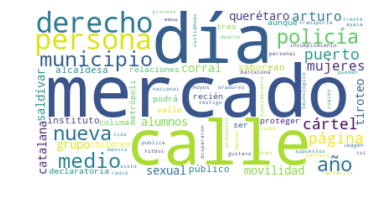

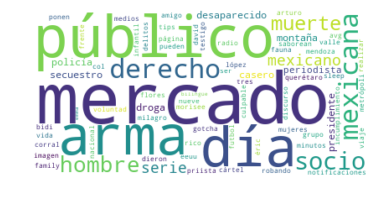

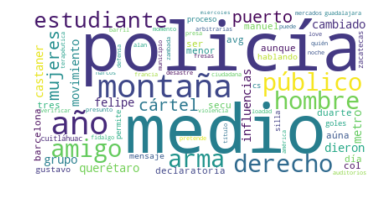

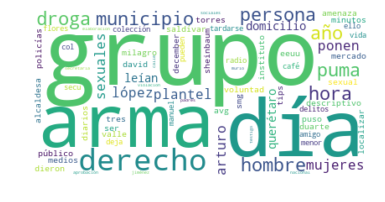

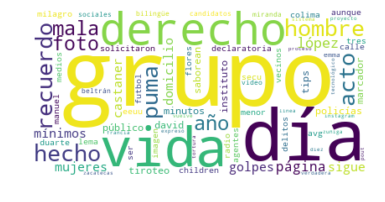

In [2]:
#We make use of a sample of the data classified according to topic and city
dict_topics = viz.create_dict_from_csv('12_12_18.csv')
for topic in ["Topic1", "Topic 2", "Topic 3",'Topic 4', 'Topic 5']:
    viz.create_word_cloud(dict_topics,topic, 75, 'white')
    